In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

In [2]:
def Period(state,t):
    # unpack the initial state vector
    M = state[0] #concentration of mRNA
    Fc = state[1] #freuqency protein synthesised in cytoplasm
    Fn = state[2] #successively built up protein concentration
    # these are our constants
    #Vs = 2.0
    Vs = 1.5
    Vm = 1.5
    Vd = 1.0
    ks = 0.5
    K = 0.2
    Km = 0.15
    Kd = 0.15
    kin = 0.02
    kout = 0.1
    n = 4 #Hill number
    # compute state derivatives w.r.t time
    dM = (Vs*(K**n))/(K**n+Fn**n)-(Vm*M/(Km+M))
    dFc = ks*M - (Vd*(Fc/(Kd+Fc))) - (kin*Fc) + (kout*Fn)
    dFn = kin*Fc - kout*Fn
    # return the state derivatives
    return [dM, dFc, dFn]

In [3]:
def viewCircadianClock(result_odeint):
    fig, axes = plt.subplots(1,1, figsize=(5, 5))
    plt.plot(result_odeint[:,1], result_odeint[:,0])
    plt.xlabel("concentration of protein in cytoplasm")
    plt.ylabel("concentration of mRNA")
    plt.show()

In [4]:
def viewProductConcentrationEvolution(result_odeint, time):
    fig, axes = plt.subplots(1,1, figsize=(10, 10))
    labels = ["concentration of mRNA", "protein level in cytoskeleton", "protein level in nucleus"]
    plt.plot (time, result_odeint[:,0], 'b', time, result_odeint[:,1], 'g', time, result_odeint[:,2], 'r')
    #plt.plot(time, result_odeint[:,0], 'b')
    #plt.plot(time, result_odeint[:,1], 'g')
    #plt.plot(time, result_odeint[:,2], 'r')
    plt.legend(labels, loc='best') 
    plt.show()


In [5]:
def periodWithVarying_kin(state,t, kin):
    
    # Unpack initial state vector
    M = state[0] # mRNA concentration
    Fc = state[1] # frequency protein synthesised in cytoplasm
    Fn = state[2] # Successively built up protein concentration
    
    # Constants/Parmeters
    #Vs = 2.0
    Vs = 1.5
    Vm = 1.5
    Vd = 1.0
    ks = 0.5
    K = 0.2
    Km = 0.15
    Kd = 0.15
    kin = kin
    kout = 0.1
    n = 4 #Hill number
    
    # Compute state derivatives w.r.t time
    dM = (Vs*(K**n))/(K**n+Fn**n)-(Vm*M/(Km+M))
    dFc = ks*M - (Vd*(Fc/(Kd+Fc))) - (kin*Fc) + (kout*Fn)
    dFn = kin*Fc - kout*Fn
    
    # Return state derivatives
    return [dM, dFc, dFn]

In [6]:
# Calculate the mean period and return coordinates of peaks
# xlist is the corresponding time points of peaks
# maxindices is indices in the array representing peaks
def getMeanPeriodandPeakInfo(array,t):
    
    # Get the indices of the maxima
    # Index represents the no. of steps from start time
    maxindices = argrelextrema(array, np.greater)
    
    # List of all timepoints where M(t) is maximum
    xlist = []

    if len(maxindices[0]) > 1:
        for item in maxindices[0]:
            xlist.append(t[item])
            
    # Get the differences between values
    # Represents local period
    differences = np.diff(xlist)
    
    # Peak differences
    peakdiff = np.diff(maxindices[0])

    # Quarter values
    m = len(t)-maxindices[0][-1]
    q0value = np.array([maxindices[0][0]]*3 * np.array([0.25,0.5,0.75]))
    q1value = maxindices[0][:-1] + peakdiff/4
    q2value = maxindices[0][:-1] + peakdiff/4*2
    q3value = maxindices[0][:-1] + peakdiff/4*3
    q1lastv = (maxindices[0][-1] + peakdiff[-1]*0.25).astype(int) if ((m//(peakdiff[-1]*0.25)!=0)) else 0
    q2lastv = (maxindices[0][-1] + peakdiff[-1]*0.5).astype(int)  if ((m//(peakdiff[-1]*0.5)!=0)) else 0
    q3lastv = (maxindices[0][-1] + peakdiff[-1]*0.75).astype(int)  if ((m//(peakdiff[-1]*0.75)!=0)) else 0
    #print("this",q1lastv)
    #print(q2lastv)
    #print(q3lastv)
    allqpositions = np.concatenate((q0value.astype(int),q1value.astype(int),q2value.astype(int),q3value.astype(int),np.array([q1lastv]),np.array([q2lastv]),np.array([q3lastv])))
    q0value = array[q0value.astype(int)]
    q1value = array[q1value.astype(int)]
    q2value = array[q2value.astype(int)]
    q3value = array[q3value.astype(int)]
    q1lastpos = np.array([t[q1lastv]])
    q2lastpos = np.array([t[q2lastv]])
    q3lastpos = np.array([t[q3lastv]])
    #print(q1lastpos)
    q1lastv = np.array([array[q1lastv]])
    q2lastv = np.array([array[q2lastv]])
    q3lastv = np.array([array[q3lastv]])
    #print("allqpositions",allqpositions)
    
    # Get the mean period
    meanP = np.average(differences)

    # Quarter time points
    q0 = np.array([xlist[0]]*3 * np.array([0.25,0.5,0.75])) # quarters before first peak
    q1 = xlist[:-1] + differences/4
    q2 = xlist[:-1] + differences*2/4
    q3 = xlist[:-1] + differences*3/4
    
    #q1last = xlist[-1] + differences[-1]/4 if ((m//(maxindices[0][-1]*0.25)!=0)) else np.empty((0))
    #q2last = xlist[-1] + differences[-1]/4*2 if ((m//(maxindices[0][-1]*0.5)!=0)) else np.empty((0))
    #q3last = xlist[-1] + differences[-1]/4*3 if ((m//(maxindices[0][-1]*0.75)!=0)) else np.empty((0))
    
    # Array values for quarters
    quartertimes = np.concatenate((q0,q1,q2,q3,q1lastpos,q2lastpos,q3lastpos))
    quartervalues = np.concatenate((q0value,q1value,q2value,q3value,q1lastv,q2lastv,q3lastv))
    
    return meanP, xlist, maxindices, quartertimes, quartervalues, allqpositions
    

In [7]:
def findPeriod(minkin, maxkin,stepsize,state0, timeGap):
    
    # Start and end time in hours
    starttime = 0.0
    endtime = 60
    t = np.arange(starttime, endtime, timeGap)
    
    results = []
    
    # Evaluate on all kin values with certain stepsize
    kinvalues = np.arange(minkin,maxkin,stepsize)
    
    # Iterate through all the kin values
    for x in kinvalues:
        
        #print("kin: ",x)
        result_odeint = odeint(periodWithVarying_kin, state0, t, args=(x,))
        
        # Get results for M, Fc, and Fn
        currentkinresults = []
        for i in range(3):
            
            array = result_odeint[:,i]
            meanP,xlist,maxindices,quartertimes,quartervalues,allqpositions = getMeanPeriodandPeakInfo(array,t)

            #if 21.48 < meanP < 21.53:
            # Append a tuple of (kin, mean period, whole result, time array, max F values)
            currentkinresults.append((x, meanP, result_odeint, t,  xlist, array[maxindices], maxindices, quartertimes, quartervalues, allqpositions))

        results.append(currentkinresults)
    
    # Results is array of array
    # results[0] is results for first kin evaluated
    # results[0][0] is results for M for first kin
    # results[0][1] is results for Fc for first kin
    # results[0][2] is results for Fn for first kin
    #print(len(results))
    return results

In [8]:
def viewResultForPeriodsForProteinWithVarying_kin(results):
    
    kin = results[1][0]
    # Based on Fc
    period = results[1][1]
    result_odeint = results[1][2]
    time = results[1][3]
    peaksF = results[1][5]
    peaksM = results[0][2][:,0][results[1][6]]

    # Plot M(t) vs Fc(t)
    # With quarters (evening, midnight, morning, and noon)
    fig, axes = plt.subplots(1,1, figsize=(5, 5))
    plt.plot(result_odeint[:,1], result_odeint[:,0], c = 'blue')
    # Plot the quarter points
    plt.plot(results[1][8],results[0][2][:,0][results[1][9]], '.', c = 'orange')
    # Plot the eves based on Fc
    plt.plot(peaksF,peaksM, '.', c = 'black')
    plt.xlabel("concentration of protein in cytoplasm")
    plt.ylabel("concentration of mRNA")
    plt.show()
    
    # Plot all M, Fc, and Fn over time
    fig, axes = plt.subplots(1,1, figsize=(10, 10))
    labels = ["concentration of mRNA", "protein level in cytoskeleton", "protein level in nucleus"]
    plt.plot (time, result_odeint[:,0], 'blue', time, result_odeint[:,1], 'green', time, result_odeint[:,2], 'red')
    # Plot M quarter points - index is 0
    plt.plot(results[0][4],results[0][5], '.', c= 'black')
    plt.plot(results[0][7],results[0][8], '.', c= 'orange')
    # Plot Fc quarter points - index is 1
    plt.plot(results[1][4],results[1][5], '.', c= 'black')
    plt.plot(results[1][7],results[1][8], '.', c= 'orange')
    # Plot Fn quarter points - index is 2
    plt.plot(results[2][4],results[2][5], '.', c= 'black')
    plt.plot(results[2][7],results[2][8], '.', c= 'orange')
    plt.show()

In [9]:
minkin = 0.01
maxkin = 0.1
stepsize = .01
state0 = [0, 0, 0]
timeGap = 0.001

In [10]:
# Function for finding period with specified Vs step size
def periodVaryingVsStep(state, t, step, light, dark):
    
    # Unpack initial state vector
    M = state[0] # mRNA concentration
    Fc = state[1] # frequency protein synthesised in cytoplasm
    Fn = state[2] # Successively built up protein concentration
    
    # Constants/Parmeters
    step = step
    Vs = 1.5
    Vm = 1.5
    Vd = 1.0
    ks = 0.5
    K = 0.2
    Km = 0.15
    Kd = 0.15
    kin = 0.0244 # Use the kin that produces a period of 21.5 h
    kout = 0.1
    n = 4 #Hill number

    # Specific Vs values depending on current time t
    currentVs = Vs if t % (dark + light) < dark else Vs + step
    
    # Compute state derivatives w.r.t time
    dM = (currentVs*(K**n))/(K**n+Fn**n)-(Vm*M/(Km+M))
    dFc = ks*M - (Vd*(Fc/(Kd+Fc))) - (kin*Fc) + (kout*Fn)
    dFn = kin*Fc - kout*Fn
    
    # Return state derivatives
    return [dM, dFc, dFn]

In [11]:
# Function for finding the minimum Vs step increase
# That produces a period of 24 h
def findVsStep(state0, light, dark):
    
    # Time parameters
    h = 0.01 # Stepsize for time
    starttime = 0.0
    endtime = 100
    
    # Each t point is a step through time in the plot
    # the value of t is an index, not an absolute value in hours
    # Here, len(t) = (end-start)/stepsize = 100/0.01 = 10,000
    t = np.arange(starttime, endtime, h)
    
    # Lighting conditions/simuli
    light = light
    dark = dark
    
    # Limits of the step size
    minstep = 0.0
    maxstep = .5
    step = 0.004
    allsteps = np.arange(minstep,maxstep,step)
    
    # Store period in array
    periods = []
    
    # Iterate through all step sizes
    for currentstep in allsteps:
        
        state = odeint(periodVaryingVsStep, state0, t, args=(currentstep,light,dark))
        Fcarray = state[:,1]
        
        # Calculate the mean period based on Fc data
        meanP,xlist,maxindices,quartertimes,quartervalues,allqpositions = getMeanPeriodandPeakInfo(Fcarray,t)
        #print("Vs step size and period: ", ("%.4f" % currentstep, "%.4f" % meanP))

        periods.append("%.4f" % meanP)

    return allsteps, periods


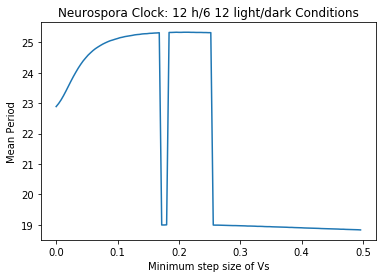

In [12]:
# Try light of 12 h and dark of 12 h
# Answer: minimum step size of .032
allsteps, periods = findVsStep(state0, 12.0, 12.0)
# Plot
plt.figure(1)
plt.plot(allsteps,periods)
plt.title('Neurospora Clock: 12 h/6 12 light/dark Conditions')
plt.xlabel("Minimum step size of Vs")
plt.ylabel("Mean Period")
plt.show()

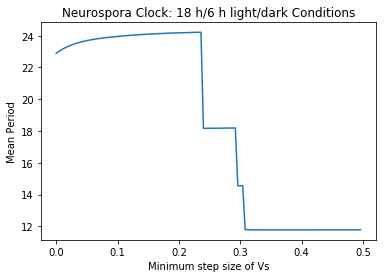

In [13]:
# Try light of 18 h and dark of 6 h
# Answer: minimum step size of 0.12
allsteps18, periods18 = findVsStep(state0, 18.0, 6.0)
# Plot
plt.figure(2)
plt.plot(allsteps18,periods18)
plt.title('Neurospora Clock: 18 h/6 h light/dark Conditions')
plt.xlabel("Minimum step size of Vs")
plt.ylabel("Mean Period")
plt.show()